In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('Mall_Customers.csv')

In [3]:
print(data.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


In [4]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


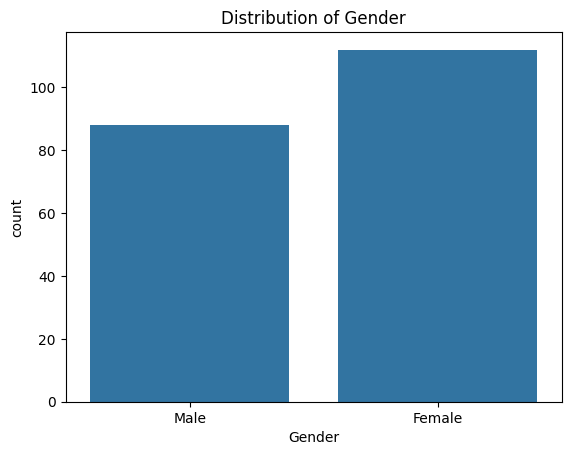

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Gender', data=data)
plt.title('Distribution of Gender')
plt.show()

In [8]:
data['Gender'].value_counts()

,count
Gender,
Female,112
Male,88


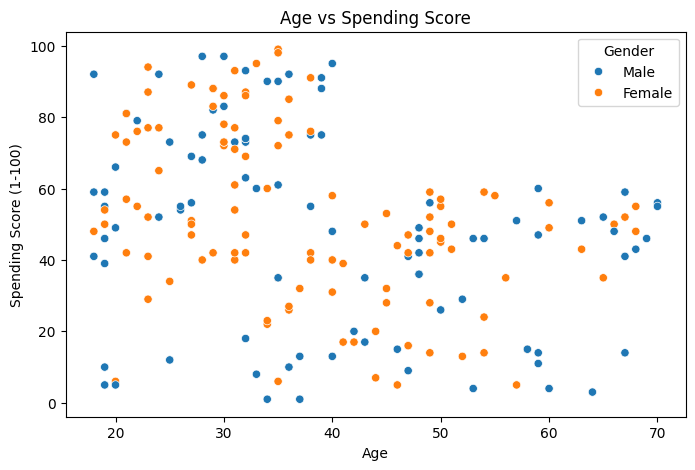

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Age vs Spending Score')
plt.show()

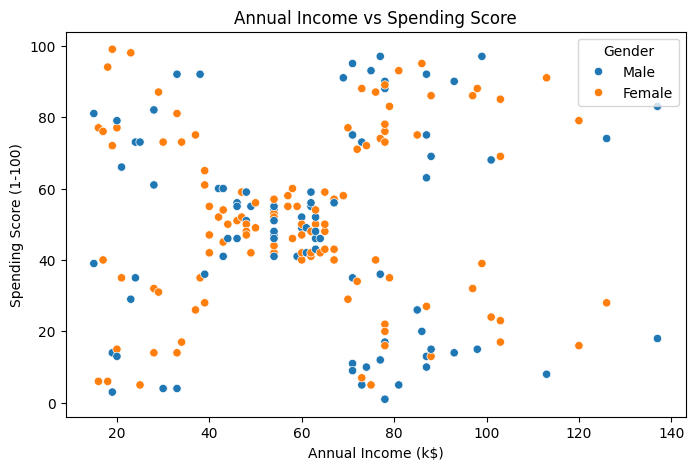

In [10]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', data=data)
plt.title('Annual Income vs Spending Score')
plt.show()

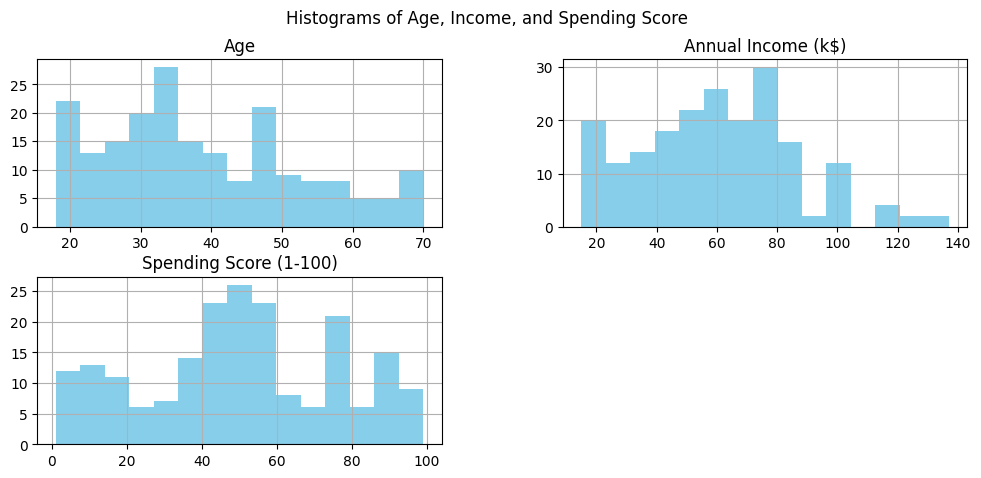

In [11]:
data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].hist(bins=15, figsize=(12, 5), color='skyblue')
plt.suptitle("Histograms of Age, Income, and Spending Score")
plt.show()

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)

kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

KMeans(n_clusters=5, random_state=42)

In [14]:
data['Cluster'] = kmeans.labels_

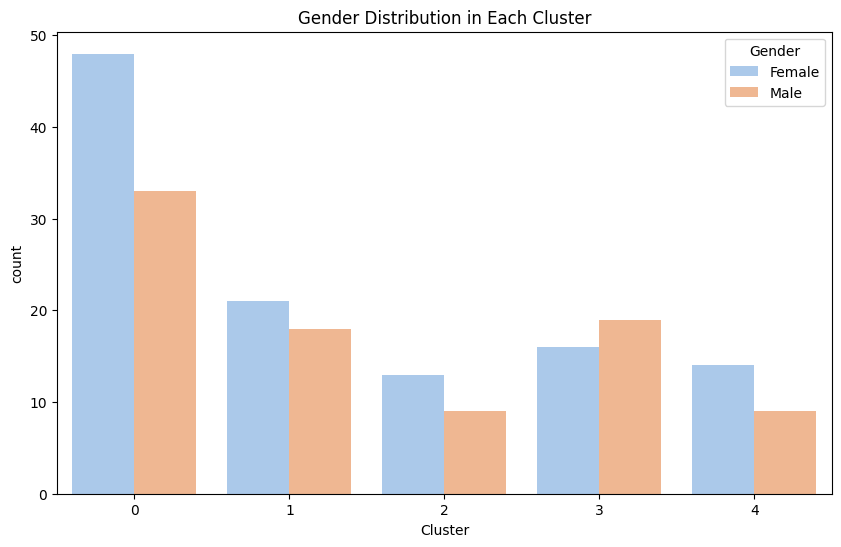

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Cluster', hue='Gender', palette='pastel')
plt.title('Gender Distribution in Each Cluster')
plt.show()

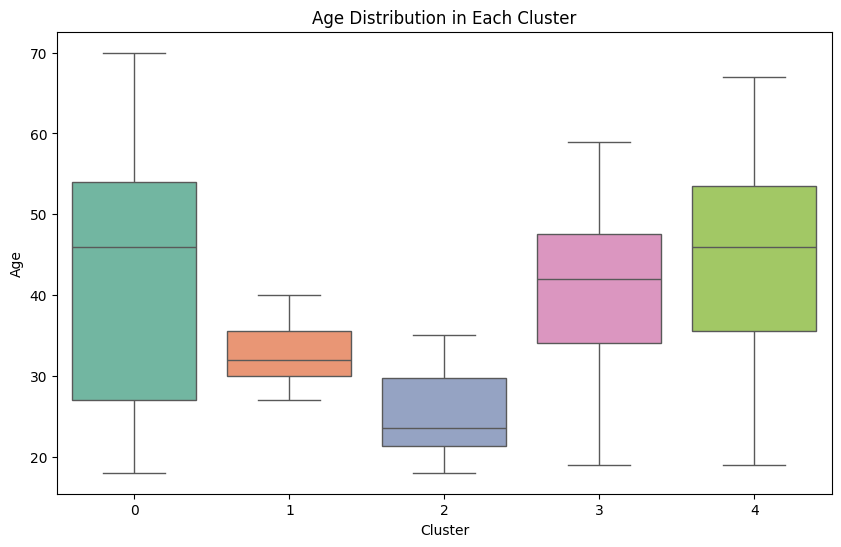

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Cluster', y='Age', hue='Cluster', palette='Set2', legend=False)
plt.title('Age Distribution in Each Cluster')
plt.show()

In [18]:
cluster_summary = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_summary)

         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


Cluster 1: High income + high spending — high-value customers.

Cluster 2: Low income + high spending — possibly impulse buyers or young shoppers.

Cluster 3: High income + low spending — price-conscious customers or conservative spenders.

Cluster 4: Low income + low spending — low-value segment, possibly budget customers.

Cluster 0: Mid-range income and spending — average customers.


In [19]:
cluster_summary.to_csv('cluster_summary.csv', index=True)